# <center>Livrable 2</center>

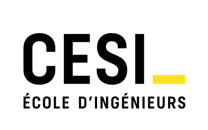

# Résoudre le Problème du Voyageur de Commerce en Python

#### 1. Solution Exacte
La fonction _tsp_exact_ utilise le module [PuLP](https://coin-or.github.io/pulp/) pour formuler le problème et les solveurs externes [CPLEX](https://www.ibm.com/analytics/cplex-optimizer), [GUROBI](https://www.gurobi.com/solutions/gurobi-optir/Cbc), et [PULP_solver](https://github.com/coin-or/pulp) pour trouver la solution exactP..html).

#### 2. Heuristiques & Métaheuristiques
Les fonctions d'heuristiques et de métaheuristiques décrites ci-dessous sont des algorithmes de recherche locale pouvant être utilisés pour de grandes instances.

Les dépendances incluent [pulp](https://github.com/coin-or/pulp), [numpy](https://numpy.org/doc/stable/), [pandas](https://pandas.pydata.org/docs/), [scipy](https://docs.scipy.org/doc/scipy/), et [copy](https://docs.python.org/3/library/copy.html).

#### Paramètres d'Entrée :

1. **_matrix_** : une matrice de coût **_NxN_** entre les points devant être visités par les nœuds avec 2 conditions :
   - L'index des lignes et des colonnes de cette matrice doit être un **ENTIER**.
   - Le dépôt est indexé par 0, c'est-à-dire que la ligne 0 représente le dépôt.

   ##### Exemple :
   ```
       0     1   2     3   4
    0   0  21.0  15  21.0  10
    1  21   0.0   5   0.5  11
    2  15   5.0   0   5.0   5
    3  21   0.5   5   0.0  10
    4  10  11.0   5  10.0   0
   ```

2. **_method_** : Le type de solveur à utiliser. Par défaut, c'est "PULP_CBC_CMD". D'autres solveurs  etisponibles soD", "GUROBI_CMD" et "COIN_CMD".
3. **_message_** : PuLP affichera un résumé du calcul si message est réglé à 1. La valeur par défaut est 0 (résumé supprimé).
4. **_route_** : Estimation de la route initiale **_(uniquement pour les heuristiques d'amélioration & métaheuristiques)_**.
5. **_trials_** : Nombre de recherches locales à effectuer, par défaut 5000 **_(uniquement pour les heuristiques d'amélioration & métaheuristiques)_**.

#### Attributs de Sortie :

1. **_route_** [Liste] : Le plus court chemin couvrant tous les nœuds. (Le chemin commence et se termine au dépôt)
2. **_route_sum_** [Scalaire] : Coût total engendré par le chemin.

Pour de petites instances avec $\leq15$ nœuds, la fonction tsp_exact fournira la solution exacte. Pour des instances $> 15$ nœuds, des solutions heuristiques sont préférées en raison du temps de calcul élevé. (Rappelez-vous, le TSP est un problème NP-difficile avec une complexité en O(n!)).

Nous définissons les heuristiques suivantes pour le TSP :

### Heuristiques de Construction :

1. **Heuristique du Plus Proche Voisin** : Le nœud le plus proche du trajet est ajouté à ce dernier. Voir [Recherche Gloutonne](https://fr.wikipedia.org/wiki/Algorithme_du_plus_proche_voisin).
2. **Heuristique d'Insertion la Plus Proche** : Le nœud le plus proche du trajet est inséré dans le trajet à l'arc de coût minimum.
3. **Heuristique d'Insertion la Moins Coûteuse** : Version modifiée de l'heuristique d'insertion la plus proche qui vérifie tous les nœuds pour l'insertion au lieu du nœud le plus proche.
4. **Heuristique d'Insertion la Plus Éloignée** : Le nœud le plus éloigné du trajet est inséré dans le trajet à l'arc de coût minimum.
5. **Heuristique de MST (Minimum Spanning Tree)** : Un arbre couvrant minimal est créé pour le réseau et les nœuds répétés sont supprimés pour former le trajet. Voir [Arbre Couvrant de Poids Minimum](https://fr.wikipedia.org/wiki/Arbre_couvrant_de_poids_minimum).

### Heuristiques d'Amélioration :

6. **Échange 2-Opt** : Un algorithme de recherche locale qui échange 2 nœuds du trajet et stocke la solution s'il a une valeur objective inférieure. Voir [2-Opt](https://fr.wikipedia.org/wiki/2-opt).

### Solutions Métaheuristiques :

7. **Recherche Tabou** : Voir [Recherche Tabou](https://fr.wikipedia.org/wiki/Recherche_tabou). Ceci est une version simple de la recherche tabou avec l'échange 2-Opt utilisé pour la recherche locale. Une version plus complète sera publiée prochainement.

## Formulation Mathématique pour la Solution Exacte :
Ci-dessous se trouve la formulation mathématique pour la solution exacte du TSP qui est exécutée par la fonction *tsp_exact()*.

### Ensembles et Variables de Décision :

$\mathbb{N}$ est l'ensemble de tous les sous-ensembles de nœuds clients $i$ et $j$.

Nous utiliserons la variable binaire $x_{ij}$.

$x_{ij}$ prendra la valeur 1 si le camion se déplace du nœud $i$ au nœud $j$, 0 sinon. $i\in\mathbb{N}$ et $j\in\mathbb{N}$.

Les autres variables sont :

$u_{i}$ prendra la valeur de l'ordre du nœud $i$ dans le trajet final du camion. $i\in\mathbb{N}$

$t_{i}$ représente l'heure d'arrivée du camion au nœud $i$.

$tt_{ij}$ représente le temps de déplacement du camion entre les nœuds $i$ et $j$.

$M$ est un nombre très grand.

Objectif : Minimiser le temps total pour visiter tous les nœuds.

$$ Obj=min\{\sum_{i}t_{i}\} $$

Contrainte 1 : Tous les nœuds doivent être visités par le camion exactement une fois.

$$ \sum_{i}x_{ij}=1\quad j\in\mathbb{N}$$

Contrainte 2 : Le camion quitte le dépôt D et revient au dépôt D' exactement une fois $i=D,D'$.

$$ \sum_{j}x_{ij}=1 $$

$$ \sum_{j}x_{ji}=1 $$

Contrainte 3 : Si le camion arrive au nœud j, alors il doit aussi en partir.

$$ \sum_{i}x_{ij}=\sum_{k}x_{jk} \quad j\in\mathbb{N}$$

Contrainte 4 : Éviter les sous-tours pour le camion.

$$ u_{j}-u_{k}-1\leq M(1-x_{jk}) \quad j,k\in\mathbb{N}$$

Contrainte 5 : Nous ajouterons le temps de déplacement $tt_{ij}$ à l'heure d'arrivée au nœud $i$ pour obtenir l'heure d'arrivée au nœud $j$ si le camion parcours le chemin $ij$

$$ t_{j}\geq t_{i}+tt_{ij}-M(1-x_{ij}) \quad i,j\in\mathbb{N}$$

```



### 2. le code :

In [1]:
import pandas as pd
import numpy as np
import csv
from pulp import *
from scipy.sparse.csgraph import minimum_spanning_tree, breadth_first_order
import copy
import time

timeOut = 180
trial = 5000

def generate_tsp_problem(num_cities, filename):
    distances = np.random.rand(num_cities, num_cities) * 100  # Distances aléatoires entre 0 et 100
    distances = (distances + distances.T) / 2
    np.fill_diagonal(distances, 0)
    np.savetxt(filename, distances, delimiter=',', fmt='%.3f')

    print(f"Le problème TSP de taille {num_cities}x{num_cities} a été sauvegardé dans {filename}")

class tsp:
    '''
    class instance initiaton
    '''
    def __init__(self):
        None

    '''
    Exact formulation of TSP
    '''
    def tsp_exact(self, matrix, method = "", message = 0):

        result = []
        result_name = []
        result_df = pd.DataFrame()
        row,col = matrix.shape

        problem = LpProblem('TravellingSalesmanProblem', LpMinimize)

        # Decision variable X for truck route
        decisionVariableX = LpVariable.dicts('decisionVariable_X', ((i, j) for i in range(row) for j in range(row)), lowBound=0, upBound=1, cat='Integer')

        # subtours elimination
        decisionVariableU = LpVariable.dicts('decisionVariable_U', (i for i in range(row)), lowBound=1, cat='Integer')

        # Decision variable T for truck arrival time
        decisionVariableT = LpVariable.dicts('decisionVariable_T', (i for i in range(row)), lowBound=0, cat='Float')

        # objective variable
        z = LpVariable("Objective_z", lowBound=0, cat='Float')

        # Objective Function
        problem += z + lpSum(matrix.iloc[i,0] * decisionVariableX[i, 0] for i in range(row))

        # Constraint
        for i in range(row):
            problem += (decisionVariableX[i,i] == 0) # elimination of (1 to 1) route
            if i==0:
                problem += (decisionVariableT[i] == 0) # elimination of (1 to 1) route
            problem += lpSum(decisionVariableX[i,j] for j in range(row))==1 # truck reaches all points once
            problem += lpSum(decisionVariableX[j,i] for j in range(row)) ==1 #truck dispatches from all points once
            for j in range(row):
                if i != j and (i != 0 and j != 0):
                    problem += decisionVariableU[i]  <=  decisionVariableU[j] + row * (1 - decisionVariableX[i, j])-1 # sub-tour elimination for truck
                if i != j and (j != 0):
                    problem += decisionVariableT[j] >= decisionVariableT[i] + matrix.iloc[i,j] - 10000*(1-decisionVariableX[i,j]) # Calculating time of arrival at each node

        # last stop time
        for i in range(row):
            problem += decisionVariableT[i] <= z

        # Solving the equation and storing the result
        if method == "CPLEX_CMD":
            status = problem.solve(CPLEX_CMD(msg=message,timeLimit=timeOut)) 
        if method == "GUROBI_CMD":
            status = problem.solve(GUROBI_CMD(msg=message,timeLimit=timeOut))
        if method == "PULP":
            status = problem.solve(PULP_CBC_CMD(msg=message, timeLimit=timeOut)) 
        for var in problem.variables():
            if (problem.status == 1):
                if (var.value() !=0):
                    result.append(var.value())
                    result_name.append(var.name)
        result_df['Variable Name'] = result_name
        result_df['Variable Value'] = result

        # creating route list      
        route = [0]*row
        for x,value in enumerate(route):
            for j in range(row):
                if (pulp.value(decisionVariableX[value,j])==1):
                    if (j!=0):
                        route[x+1] = j
        route.append(0)

        # return final route and objective value(trip completion time)
        return(route, problem.objective.value())


    '''
    Nearest neighbour heuristic
    '''
    def nn_heuristic(self, matrix):

        if isinstance(matrix.columns[0], str):
            print("Error: Column index should be INT") 
            return None

        points = list(range(1,len(matrix.loc[0])))
        backup = matrix
        matrix = matrix.replace(0, np.nan)
        matrix = matrix.iloc[:,1:]
        route=[]
        route_sum=0
        distance_sum = []
        distance = 0
        position = 0
        while(len(points)>=1):
            arg_min = matrix.loc[position].idxmin()
            distance = distance + matrix.loc[position,arg_min]
            distance_sum.append(distance)
            route.append(arg_min)
            points.remove(arg_min)
            matrix = matrix.drop([arg_min], axis = 1)
            position = arg_min
        route.insert(0,0)
        route.append(0)
        for i in range(len(route)-1):
            route_sum= route_sum+backup.iloc[route[i], route[i+1]]
        return(route, route_sum) # returns final route and route sum


    '''
    Nearest insertion heuristic
    '''
    def ni_heuristic(self, matrix):

        if isinstance(matrix.columns[0], str):
            print("Error: Column index should be INT") 
            return None
        backup = matrix 
        points = list(range(1,len(matrix.loc[0])))
        matrix = matrix.replace(0, np.nan)
        matrix = matrix.drop(0, axis = 1)
        route=[] 
        route_sum=0
        route.append(0)
        while(len(points)>=1):
            min = 100000
            for i in route:
                arg_min = matrix.loc[i].idxmin()
                if (route.count(arg_min)) == 0:
                    if (backup.iloc[i, arg_min]<min):
                        min_node = arg_min
                        min = backup.iloc[i, arg_min]
            if len(route)>=3:
                best_position = 10000
                node = 0
                for i in range(len(route)-1):
                    saving = backup.iloc[route[i],min_node] + backup.iloc[min_node, route[i+1]] - backup.iloc[route[i],route[i+1]]
                    if (saving<=best_position):
                        node = i
                        best_position = saving
                route.insert(node+1, min_node)
                points.remove(min_node)
                matrix=matrix.drop([min_node], axis = 1)
            else:
                route.append(min_node)
                points.remove(min_node)
                matrix=matrix.drop([min_node], axis = 1)
        route.append(0)

        for i in range(len(route)-1):
            route_sum= route_sum+backup.iloc[route[i], route[i+1]]
        return (route, route_sum) # returns final route


    '''
    Cheapest insertion heuristic
    '''
    def ci_heuristic(self,matrix):

        if isinstance(matrix.columns[0], str):
            print("Error: Column index should be INT") 
            return None
        backup = matrix 
        route_sum=0
        points = list(range(1,len(matrix.loc[0])))
        matrix = matrix.replace(0, np.nan)
        matrix = matrix.drop(0, axis = 1)
        route=[]
        position = 0 
        route.append(0)
        while(len(points)>=1):
            if (len(route))<3:
                for i in route:
                    min_node = matrix.loc[position].idxmin()
                route.append(min_node)
                points.remove(min_node)
                matrix = matrix.drop([min_node], axis = 1)
                position = min_node

            if len(route)>=3:
                min_k=0
                best_position = 10000
                node = 0
                for j in points:
                    min_k = j
                    for i in range(len(route)-1):
                        saving = backup.iloc[route[i],min_node] + backup.iloc[min_node, route[i+1]] - backup.iloc[route[i],route[i+1]]
                        if (saving<=best_position):
                            min_node = min_k
                            node = i
                            best_position = saving
                route.insert(node+1, min_node)
                points.remove(min_node)
                matrix=matrix.drop([min_node], axis = 1)
        route.append(0)

        for i in range(len(route)-1):
            route_sum= route_sum+backup.iloc[route[i], route[i+1]]
        return (route, route_sum) # returns final route


    '''
    Farthest insertion heuristic
    '''
    def fi_heuristic(self, matrix):

        if isinstance(matrix.columns[0], str):
            print("Error: Column index should be INT") 
            return None
        backup = matrix 
        route_sum=0
        points = list(range(1,len(matrix.loc[0])))
        matrix = matrix.replace(0, np.nan)
        matrix = matrix.drop(0, axis = 1)
        route=[]
        route.append(0)
        while(len(points)>=1):
            min = 100000
            for i in route:
                arg_min = matrix.loc[i].idxmax()
                if (route.count(arg_min)) == 0:
                    if (backup.iloc[i, arg_min]<min):
                        min_node = arg_min
                        min = backup.iloc[i, arg_min]
            if len(route)>=3:
                best_position = 10000
                node = 0
                for i in range(len(route)-1):
                    saving = backup.iloc[route[i],min_node] + backup.iloc[min_node, route[i+1]] - backup.iloc[route[i],route[i+1]]
                    if (saving<=best_position):
                        node = i
                        best_position = saving
                route.insert(node+1, min_node)
                points.remove(min_node)
                matrix=matrix.drop([min_node], axis = 1)
            else:
                route.append(min_node)
                points.remove(min_node)
                matrix=matrix.drop([min_node], axis = 1)
        route.append(0)

        for i in range(len(route)-1):
            route_sum= route_sum+backup.iloc[route[i], route[i+1]]
        return (route, route_sum)


    '''
    MST  heuristic
    '''
    def MST_heuristic(self, matrix):

        if isinstance(matrix.columns[0], str):
            print("Error: Column index should be INT") 
            return None
        route_sum=0
        tree = minimum_spanning_tree(matrix)
        route = breadth_first_order(tree, i_start=0, directed=False, return_predecessors=False).tolist()
        route.append(0)

        for i in range(len(route)-1):
            route_sum= route_sum+matrix.iloc[route[i], route[i+1]]
        return(route, route_sum)

    
    '''
    2-Opt Improvement  heuristic
    '''
    def Opt2(self, route, matrix, trials=5000):

        if isinstance(matrix.columns[0], str):
            print("Error: Column index should be INT") 
            return None
        route_sum=0
        for i in range(len(route)-1):
            route_sum= route_sum+matrix.iloc[route[i], route[i+1]]

        for i in range(trials):
            previous_obj = route_sum
            backup=route
            a=np.random.randint(1,len(route)-2)
            b=np.random.randint(1,len(route)-2)
            if (a-b >1) or (b-a >1):
                v1=route[a]
                v2=route[a+1]
                v3=route[b]
                v4=route[b+1]
                route[a]=v3
                route[a+1]=v4
                route[b]=v1
                route[b+1]=v2
            new_route_sum=0
            for j in range(len(route)-1):
                new_route_sum= new_route_sum+matrix.iloc[route[j], route[j+1]]
            if (new_route_sum<previous_obj):
                route_sum=new_route_sum
            else:
                route=backup

        return (route, route_sum)
    
    
    '''
    Tabu search
    '''
    def tabu_search(self, route, matrix, trials=5000):

        if isinstance(matrix.columns[0], str):
            print("Error: Column index should be INT") 
            return None
    
        route_backup= copy.deepcopy(route)
        tabu_step=[]
        route_sum=0
        for i in range(len(route)-1):
            route_sum= route_sum+matrix.iloc[route[i], route[i+1]]
        tabu_list=[]
        tabu_list.append(route_backup)
        for i in range(trials):
            previous_obj = copy.deepcopy(route_sum)
            backup=copy.deepcopy(route)
            a=np.random.randint(1,len(route)-1)
            b=np.random.randint(1,len(route)-1)
            v1=route[a]
            v2=route[b]
            route[a]=v2
            route[b]=v1
            count=0
            for k in tabu_list:
                if (route == k):
                    count=count+1
            if count==0:
                new_route_sum=0
                for j in range(len(route)-1):
                    new_route_sum= new_route_sum+matrix.iloc[route[j], route[j+1]]
                if (new_route_sum<previous_obj):
                    route_sum=copy.deepcopy(new_route_sum)
                    tabu_list.append(copy.deepcopy(route))
                    tabu_step.append(i)
                if (new_route_sum>previous_obj):
                    s = np.random.normal(0.5, 0.1)
                    if s>0.9:
                        route_sum=copy.deepcopy(new_route_sum)
                        tabu_list.append(copy.deepcopy(route))
                        tabu_step.append(i)        
                else:
                    route=copy.deepcopy(backup)

        tabu_route_sum=0
        lowest_sum = float('inf')
        lowest_route = []
        for items in tabu_list:
            tabu_route_sum=0
            for j in range(len(items)-1):
                tabu_route_sum= tabu_route_sum+ matrix.iloc[items[j], items[j+1]]
            if tabu_route_sum<lowest_sum:
                lowest_sum = tabu_route_sum
                lowest_route = items
        
        return (lowest_route, lowest_sum)

    
    '''
    Grid Search for heuristics 
    '''
    def grid_search(self, matrix, heuristics_list):

        if isinstance(matrix.columns[0], str):
            print("Error: Column index should be INT") 
            return None
        result = pd.DataFrame(columns=list(range(0,len(matrix.index)+3)))
        for i in heuristics_list:
            func = getattr(tsp, i)
            route,route_sum = func(self, matrix)
            route.append(route_sum)
            route.insert(0,i)
            result.loc[len(result.index)] = route
        return result

def run_algorithm(name, func, *args):
    start_time = time.time()
    res = func(*args)
    exe_time = time.time() - start_time
    print(f"Name : {name} || Time : {exe_time} || resultat : {res}")
    return {"Algorithm": name, "Result": res[1], "Execution Time": exe_time} #ajouter autres déterminant

results = []
csv_filename = 'results.csv'

for i in range(5,100 , 5):
    # Genere le csv
    generate_tsp_problem(i, 'Hamilton_road_distance.csv')
    
    # Read the CSV with integer columns
    matrix = pd.read_csv('Hamilton_road_distance.csv', header=None)
    matrix.columns = matrix.columns.astype(int)  # Convert column headers to integers
    #print(matrix)
    
    sol = tsp()
    
    # Exécution des algorithmes et stockage des résultats
    #results.append({**run_algorithm("Exact_PULP", sol.tsp_exact, matrix, 'PULP', 1), "Nodes" : i})
    #results.append({**run_algorithm("Exact_GUROBI", sol.tsp_exact, matrix, 'GUROBI_CMD', 1), "Nodes" : i})
    #results.append({**run_algorithm("Exact_CPLEX", sol.tsp_exact, matrix, 'CPLEX_CMD'), "Nodes" : i})
    '''
    results.append({**run_algorithm("H&M_Nearest Neighbor", sol.nn_heuristic, matrix), "Nodes" : i})
    results.append({**run_algorithm("H&M_Nearest Insertion", sol.ni_heuristic, matrix), "Nodes" : i})
    results.append({**run_algorithm("H&M_Cheapest Insertion", sol.ci_heuristic, matrix), "Nodes" : i})
    results.append({**run_algorithm("H&M_Farthest Insertion", sol.fi_heuristic, matrix), "Nodes" : i})
    results.append({**run_algorithm("H&M_MST", sol.MST_heuristic, matrix), "Nodes" : i})
    '''
    initial_route = list(range((i-1) + 1)) + [0]
    #results.append({**run_algorithm("H&M_2-Opt Exchange", sol.Opt2, initial_route, matrix, 15000), "Nodes" : i})
    results.append({**run_algorithm("H&M_Tabu Search", sol.tabu_search, initial_route, matrix, 15000), "Nodes" : i})
    
    #df = pd.DataFrame(results)
    #df.to_csv('results.csv', mode='a',header=False, index=False)

# Création du DataFrame pandas
df = pd.DataFrame(results)
df.to_csv('results_Opt2.csv', index=False)
# Affichage du DataFrame
print(df)

Le problème TSP de taille 5x5 a été sauvegardé dans Hamilton_road_distance.csv
Name : H&M_Tabu Search || Time : 1.2048683166503906 || resultat : ([0, 3, 2, 4, 1, 0], 174.79500000000002)
Le problème TSP de taille 10x10 a été sauvegardé dans Hamilton_road_distance.csv
Name : H&M_Tabu Search || Time : 2.550058364868164 || resultat : ([0, 8, 3, 5, 9, 2, 7, 6, 4, 1, 0], 290.9560000000001)
Le problème TSP de taille 15x15 a été sauvegardé dans Hamilton_road_distance.csv
Name : H&M_Tabu Search || Time : 3.7340922355651855 || resultat : ([0, 5, 11, 9, 4, 8, 3, 14, 6, 13, 12, 2, 10, 7, 1, 0], 466.50800000000004)
Le problème TSP de taille 20x20 a été sauvegardé dans Hamilton_road_distance.csv
Name : H&M_Tabu Search || Time : 4.919830322265625 || resultat : ([0, 13, 2, 17, 11, 5, 8, 1, 4, 7, 12, 3, 18, 9, 10, 14, 16, 15, 6, 19, 0], 627.02)
Le problème TSP de taille 25x25 a été sauvegardé dans Hamilton_road_distance.csv
Name : H&M_Tabu Search || Time : 6.349373817443848 || resultat : ([0, 21, 17, 2

C:\Users\glicp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\glicp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


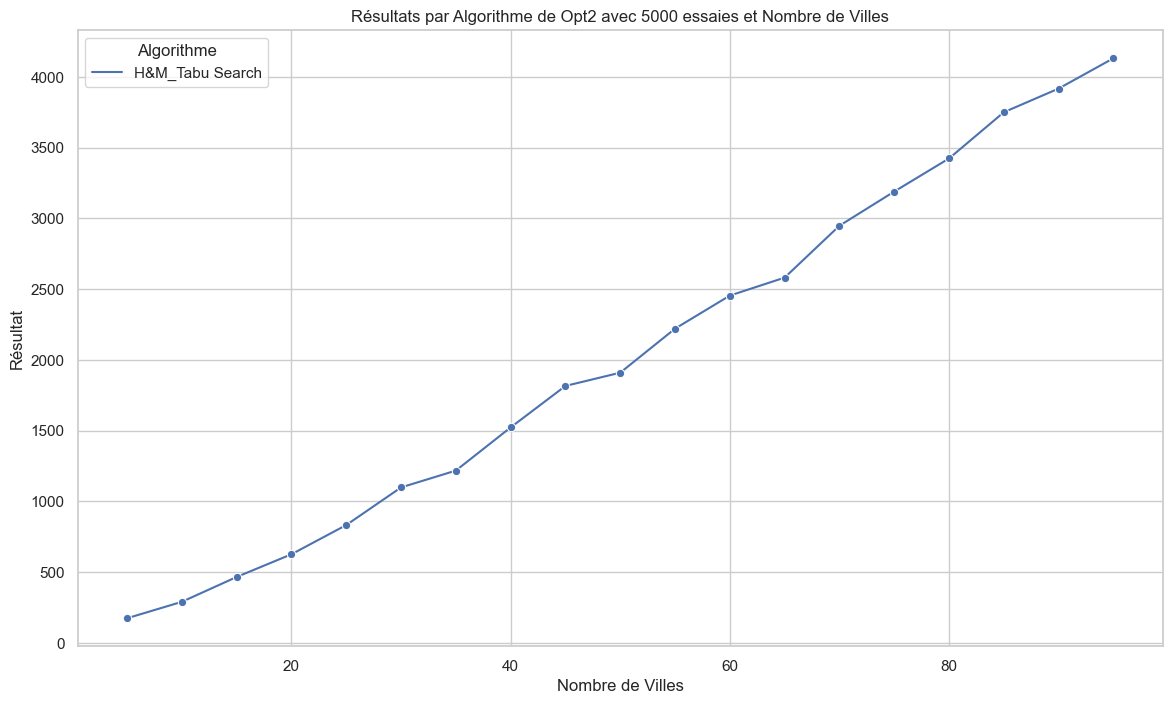

C:\Users\glicp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\glicp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


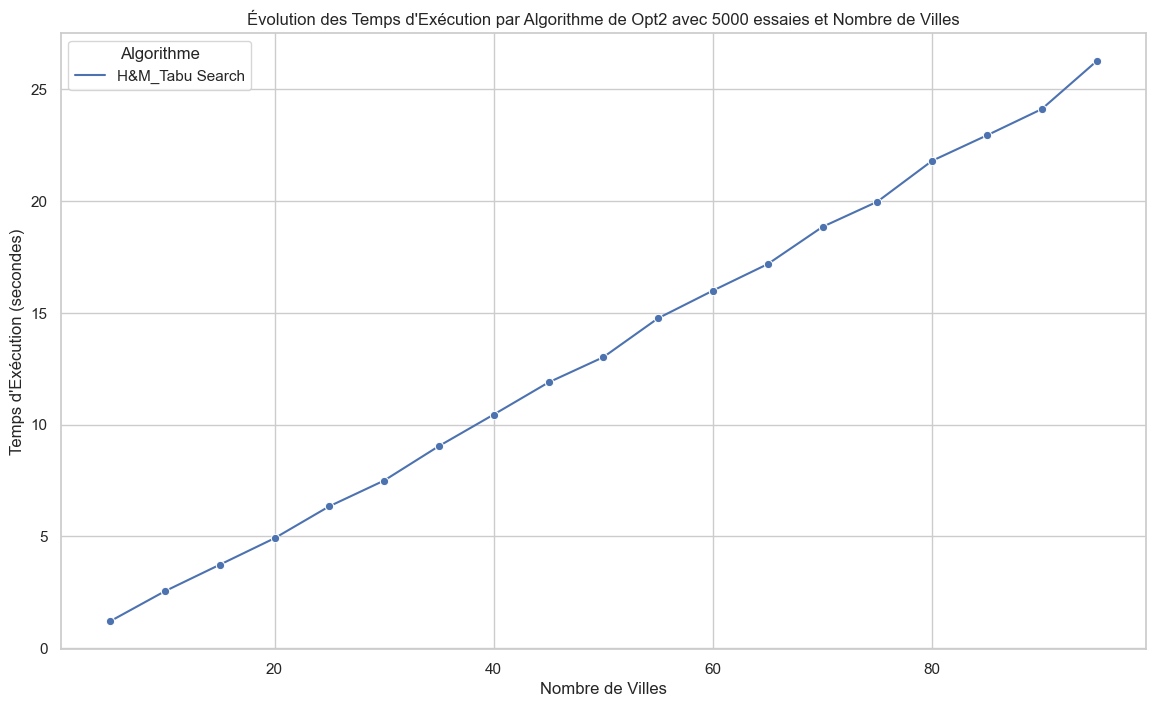


Les tableaux ont été sauvegardés dans 'execution_time_pivot.csv' et 'result_pivot.csv'.

Statistiques des temps d'exécution et des résultats par algorithme :
                 Execution Time_mean  Execution Time_std  \
Algorithm                                                  
H&M_Tabu Search            13.293343            7.760911   

                 Execution Time_median  Result_mean   Result_std  \
Algorithm                                                          
H&M_Tabu Search              13.019814  2030.759211  1285.724547   

                 Result_median  
Algorithm                       
H&M_Tabu Search       1910.317  

Les statistiques ont été sauvegardées dans 'algorithm_statistics.csv'.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def generate_analysis(file_path):
    # Charger le fichier CSV
    data = pd.read_csv(file_path)

    # Convertir les colonnes 'Execution Time' et 'Result' en type numérique si nécessaire
    data['Execution Time'] = pd.to_numeric(data['Execution Time'], errors='coerce')
    data['Result'] = pd.to_numeric(data['Result'], errors='coerce')

    # Configurer le style de visualisation
    sns.set(style="whitegrid")

    # Créer le graphe des résultats par algorithme et nombre de villes
    plt.figure(figsize=(14, 8))
    sns.lineplot(data=data, x="Nodes", y="Result", hue="Algorithm", marker="o")
    plt.title('Résultats par Algorithme de Opt2 avec 5000 essaies et Nombre de Villes')
    plt.xlabel('Nombre de Villes')
    plt.ylabel('Résultat')
    plt.legend(title='Algorithme')
    plt.grid(True)
    plt.savefig('Opt2_5000_results_by_algorithm.png')  # Sauvegarder l'image
    plt.show()

    # Créer le graphe de l'évolution des temps d'exécution par algorithme et nombre de villes
    plt.figure(figsize=(14, 8))
    sns.lineplot(data=data, x="Nodes", y="Execution Time", hue="Algorithm", marker="o")
    plt.title("Évolution des Temps d'Exécution par Algorithme de Opt2 avec 5000 essaies et Nombre de Villes")
    plt.xlabel('Nombre de Villes')
    plt.ylabel('Temps d\'Exécution (secondes)')
    plt.legend(title='Algorithme')
    plt.grid(True)
    plt.savefig('Opt2_5000_execution_time_evolution.png')  # Sauvegarder l'image
    plt.show()

    # Créer le tableau de l'évolution des temps d'exécution
    execution_time_pivot = data.pivot_table(index='Nodes', columns='Algorithm', values='Execution Time', aggfunc='mean')

    # Créer le tableau des résultats
    result_pivot = data.pivot_table(index='Nodes', columns='Algorithm', values='Result', aggfunc='mean')

    # Sauvegarder les tableaux dans des fichiers CSV
    execution_time_pivot.to_csv('execution_time_pivot.csv')
    result_pivot.to_csv('result_pivot.csv')
    print("\nLes tableaux ont été sauvegardés dans 'execution_time_pivot.csv' et 'result_pivot.csv'.")

    # Calculer les statistiques pour chaque algorithme
    stats = data.groupby('Algorithm').agg({
        'Execution Time': ['mean', 'std', 'median'],
        'Result': ['mean', 'std', 'median']
    })
    
    # Renommer les colonnes
    stats.columns = ['_'.join(col).strip() for col in stats.columns.values]
    stats.rename(columns={'Execution Time_<lambda_0>': 'Execution Time_mad', 'Result_<lambda_0>': 'Result_mad'}, inplace=True)

    # Afficher les statistiques
    print("\nStatistiques des temps d'exécution et des résultats par algorithme :")
    print(stats)
    
    # Sauvegarder les statistiques dans un fichier CSV
    stats.to_csv('algorithm_statistics.csv')
    print("\nLes statistiques ont été sauvegardées dans 'algorithm_statistics.csv'.")
    
# Chemin du fichier CSV
file_path = 'results_Opt2.csv'

# Générer les analyses
generate_analysis(file_path)